In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikit as sk
import technicalIndicators as ti
%matplotlib inline

X, ret = sk.load_X_returns('Data/BTC/BTC-2018-11-27.csv', ['close', 'high', 'low', 'volumefrom', 'volumeto', 'open'] )
df = pd.read_csv('Data/BTC/BTC-2018-11-27.csv')

In [2]:
import imp
imp.reload(sk)
imp.reload(ti)

<module 'technicalIndicators' from '/Users/kat/Documents/nicolaus copernicus/soup4lyfe/technicalIndicators.py'>

In [3]:
def test_returns(X, ret, df, model, daily = True, bucketing = sk.kat, _mc = 3):
    y_tr, y_pr = sk.model_cross_val_predict(X, ret.apply(bucketing), model = model)
    pred = [int(p) for p in y_pr.flatten()]
    if daily:
        pos, neg, zer = (-1, 1, 0)
    else:
        pos, neg, zer = ('Sell', 'Buy', 'Hold')
    pred = [pos if p == _mc else ( neg if p == -1*_mc else zer ) for p in pred]
    while len(pred) < df.shape[0]:
        pred.insert(0, 0)
    if daily:
        df['returns'] = pd.Series(pred)*ret
        return df
    else:
        df['signal'] = pred
        returns = ti.get_returns(df, duplicates = True, return_df = True)
        return returns[ returns.signal == 'Sell']

In [4]:
def plot_returns(df, returns_col, color, label, cum_only = False):
    if not cum_only:
        plt.plot(df.timestamp, df[returns_col], color + 'o', label = label)
    plt.plot(df.timestamp, np.cumsum(df[returns_col]), color + '-', label = 'Cumulative ' + label)

In [5]:
def test_two_strats(X, ret, df, model, model_str, init = True, display = True,
                    _swing = True, _daily = True, _strat_lab = True, bucketing = sk.kat, _mc = 3):
    if _swing:
        a = test_returns(X, ret, df, model, daily = False, bucketing = bucketing, _mc = _mc)
        a.timestamp = pd.to_datetime(a.timestamp)
    if _daily:
        b = test_returns(X, ret, df, model, daily = True, bucketing = bucketing, _mc = _mc)
        b.timestamp = pd.to_datetime(b.timestamp)
    
    if init:
        plt.figure(figsize=(15, 9.5))
    if _swing:
        plot_returns(a, 'close_pct_change', 'b' if _strat_lab else '', 'Swing Trading Returns' if _strat_lab else (model_str + ' Returns'), cum_only = not _strat_lab)
    if _daily:
        plot_returns(b, 'returns', 'g' if _strat_lab else '', 'Daily Trading Returns' if _strat_lab else (model_str + ' Returns'), cum_only = not _strat_lab)
    if display:
        plt.axhline(y = 0, color = 'k')
        plt.title(model_str +' Performance')
        plt.ylabel('Percentage Returns')
        plt.legend()

In [6]:
def test_many_models(X, ret, df, models, model_strs, daily = True):
    strat = 'Daily ' if daily else 'Swing '
    init = True
    for model, model_str in zip(models, model_strs):
        test_two_strats(X, ret, df, model, model_str, init = init, display = False, 
                        _swing = (False if daily else True), _daily = (True if daily else False), _strat_lab = False)
        init = False
    plt.axhline(y = 0, color = 'k')
    plt.title(strat +'Trading Strategy Performance by Model')
    plt.ylabel('Percentage Returns')
    plt.legend()

/Users/kat/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


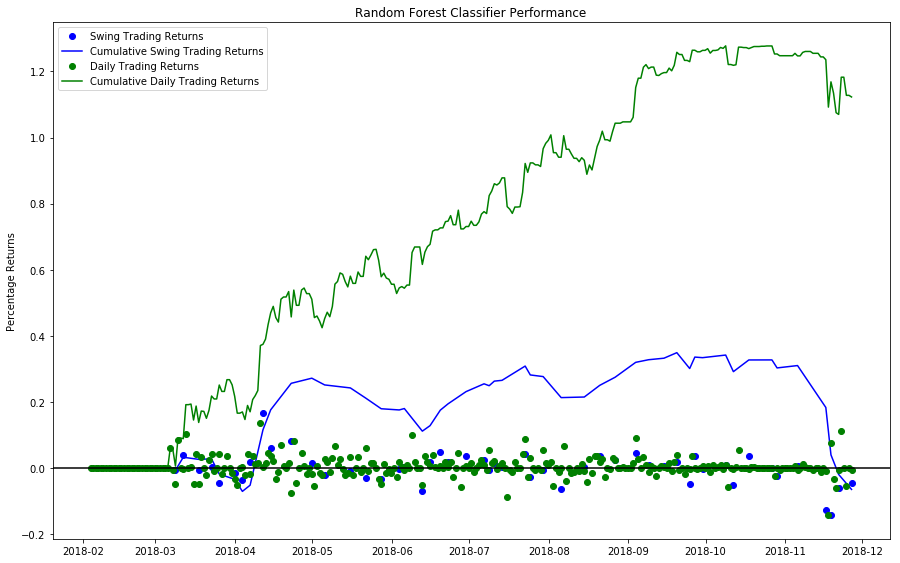

In [7]:
from sklearn.ensemble import RandomForestClassifier
test_two_strats(X, ret, df, RandomForestClassifier(), 'Random Forest Classifier')

In [8]:
plt.close()

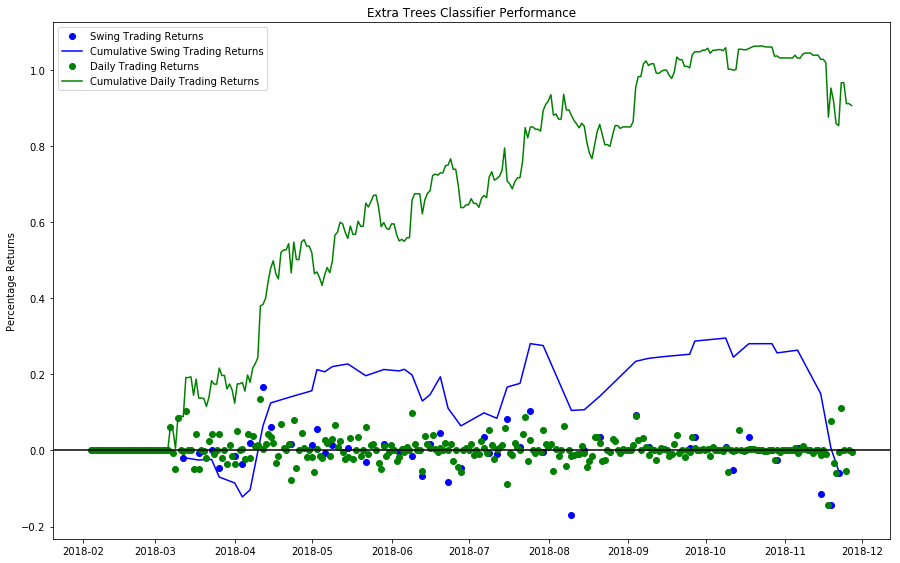

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
test_two_strats(X, ret, df, ExtraTreesClassifier(), 'Extra Trees Classifier')

In [10]:
plt.close()

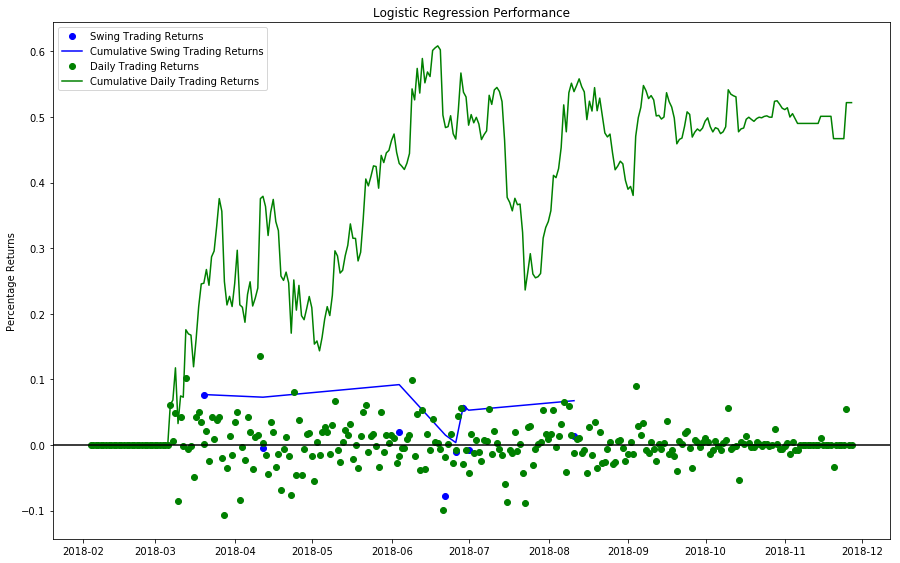

In [11]:
from sklearn.linear_model import LogisticRegression
test_two_strats(X, ret, df, LogisticRegression(), 'Logistic Regression', bucketing = lambda x: sk.kat(x, 0.01, 1), _mc = 1)

In [12]:
plt.close()

/Users/kat/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


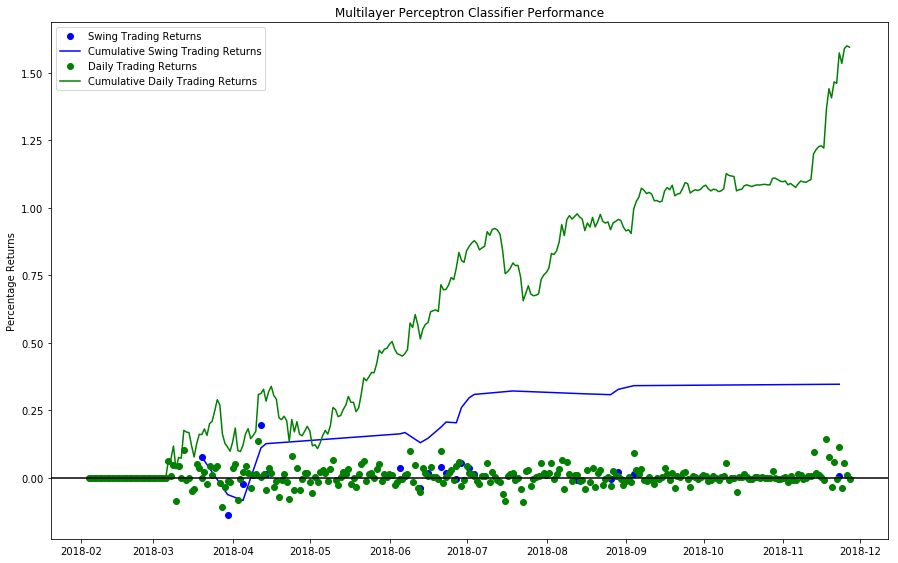

In [13]:
from sklearn.neural_network import MLPClassifier
test_two_strats(X, ret, df, MLPClassifier(), 'Multilayer Perceptron Classifier')

In [14]:
plt.close()

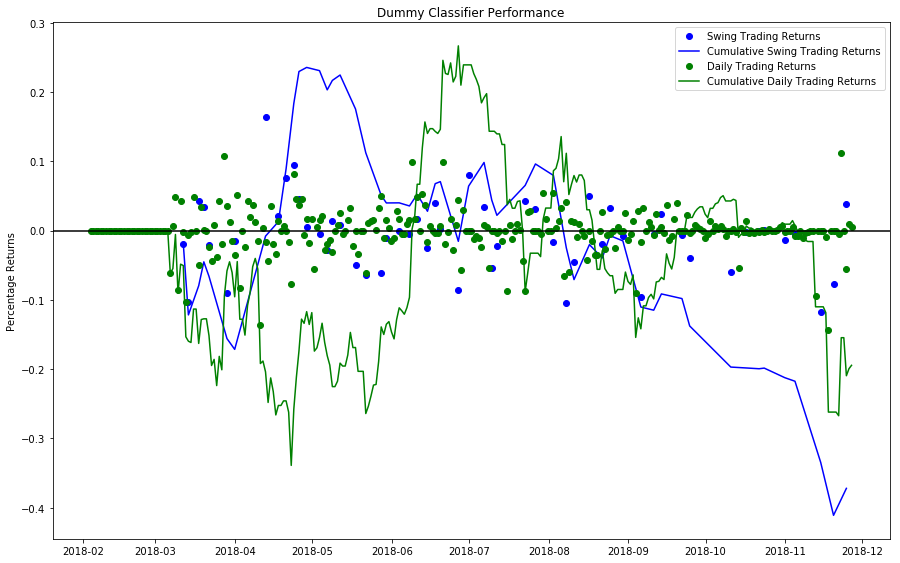

In [15]:
from sklearn.dummy import DummyClassifier
test_two_strats(X, ret, df, DummyClassifier(), 'Dummy Classifier')

In [16]:
plt.close()

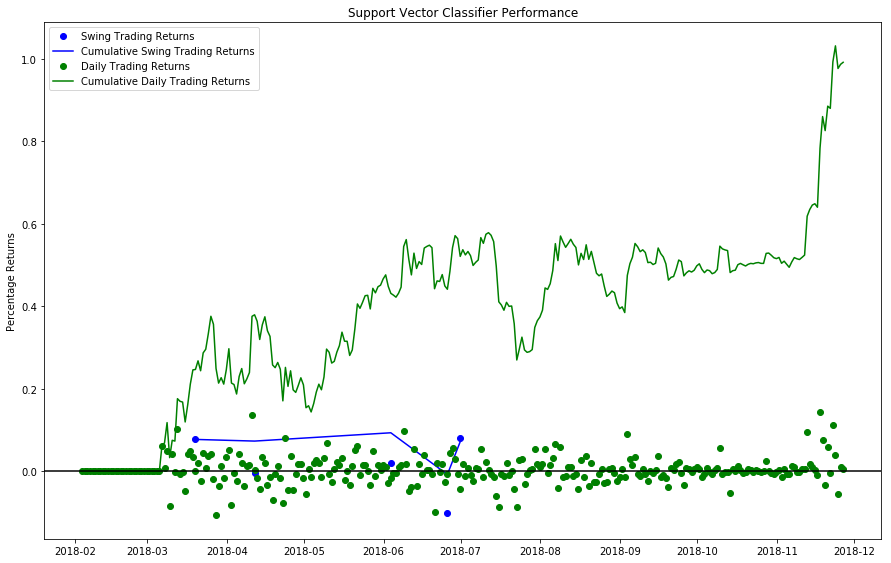

In [17]:
from sklearn.svm import SVC
test_two_strats(X, ret, df, SVC(), 'Support Vector Classifier')

In [18]:
plt.close()

/Users/kat/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


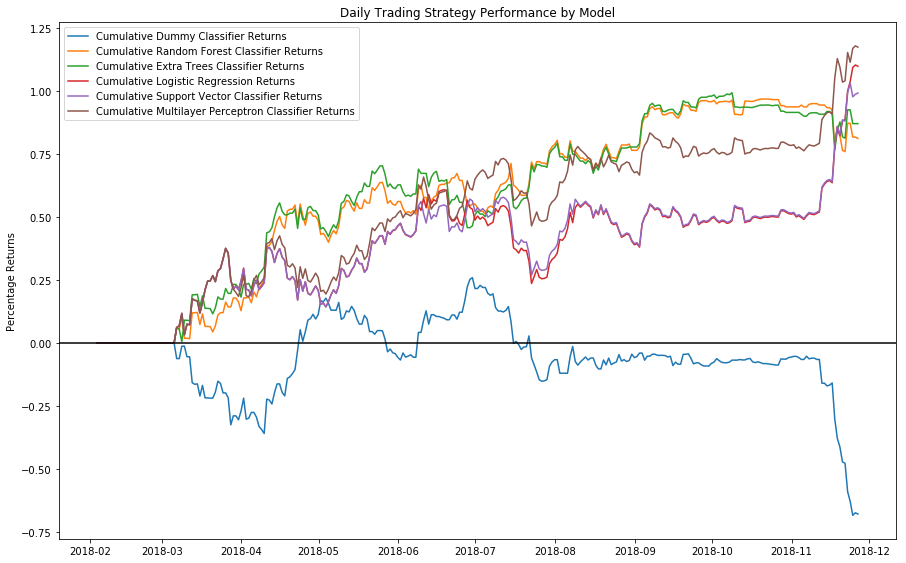

In [19]:
test_many_models(X, ret, df, [DummyClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), LogisticRegression(), SVC() ,MLPClassifier()], 
                 ['Dummy Classifier', 'Random Forest Classifier', 'Extra Trees Classifier', 'Logistic Regression', 
                  'Support Vector Classifier', 'Multilayer Perceptron Classifier'],
                 daily = True)

In [20]:
plt.close()

/Users/kat/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


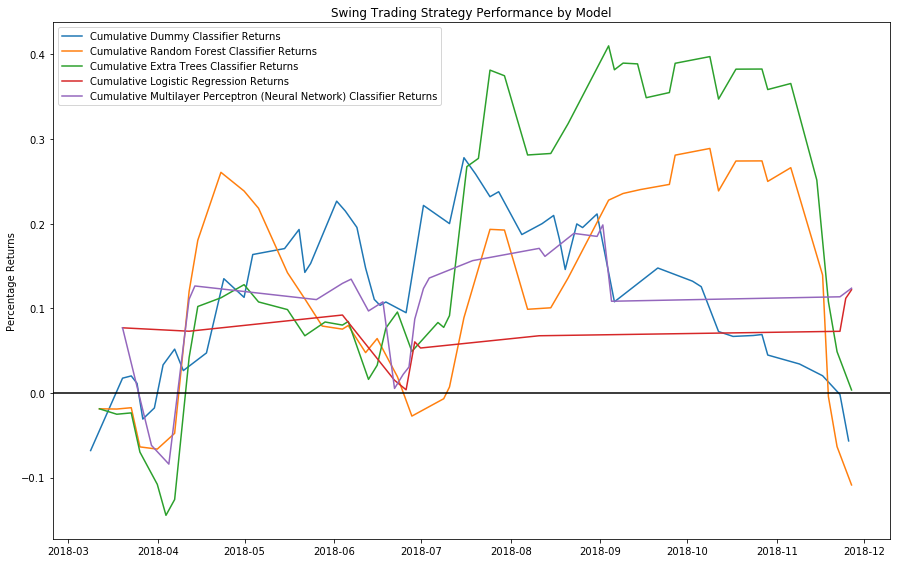

In [21]:
test_many_models(X, ret, df, [DummyClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), LogisticRegression(), MLPClassifier()], 
                 ['Dummy Classifier', 'Random Forest Classifier', 'Extra Trees Classifier', 'Logistic Regression', 'Multilayer Perceptron (Neural Network) Classifier'],
                 daily = False)

In [22]:
plt.close()